In [1]:
# Import Libraries
import serial
import numpy as np
import time
import os
import pellet_sorter as ps

In [2]:
### Initializations
# sorter_chain, sorter_parameters and arduino should be global variables

n_joints = 2
sorter_parameters = [{'steps_in_rotation':0,'gear_ratio':0,'length_mm':0,'bound_rad':0, 'cartesian':[0,0]} for k in range(n_joints)]
## Top
sorter_parameters[0]['steps_in_rotation'] = np.round(200*1.1)   # Calibrate multiplicative factor to compensate lost steps if necessary
sorter_parameters[0]['gear_ratio'] = 6
sorter_parameters[0]['length_mm'] = 180.5
sorter_parameters[0]['bound_rad'] = np.deg2rad(35)    # np.deg2rad(35)  # IK Rotation bound in either direction, not total
sorter_parameters[0]['cartesian'] = [sorter_parameters[0].get('length_mm'), 0]
## Bot
sorter_parameters[1]['steps_in_rotation'] = 812
sorter_parameters[1]['gear_ratio'] = 2.4
sorter_parameters[1]['length_mm'] = np.sqrt(32.7**2 + 79.2**2)  # 84.4
sorter_parameters[1]['bound_rad'] = np.deg2rad(10*360)
sorter_parameters[1]['cartesian'] = [sorter_parameters[1].get('length_mm'), 0]


sorter_chain = ps.sorter_chain_update(sorter_parameters)

tray_1 = ps.Tray('1', [sorter_parameters[0]['length_mm'], 0], [
    ps.Slot([79.2,32.7]),
    ps.Slot([32.7,79.2]),
    ps.Slot([-32.7,79.2]),
    ps.Slot([-79.2,32.7]),
    ps.Slot([-79.2,-32.7]),
    ps.Slot([-32.7,-79.2]),
    ps.Slot([32.7,-79.2]),
    ps.Slot([79.2,-32.7]),
    ps.Slot([0,0]), 
    ])

tray_1.fill_all_slots_ez(0, 0.160)  # Adjust cup capacity in kg here

tray_1.set_all_material('PLA####')

/home/miguel/.local/lib/python3.10/site-packages/ikpy/chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


/home/miguel/.local/lib/python3.10/site-packages/ikpy/chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


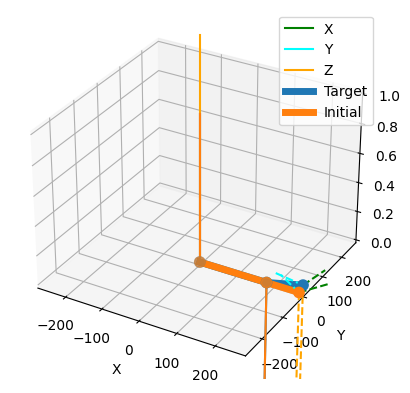

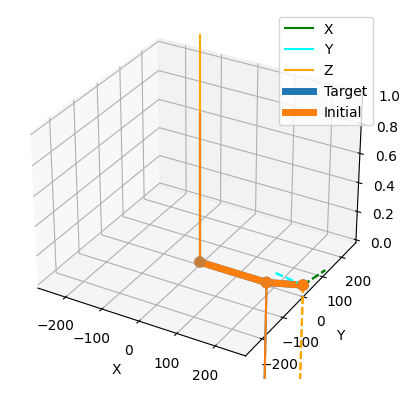

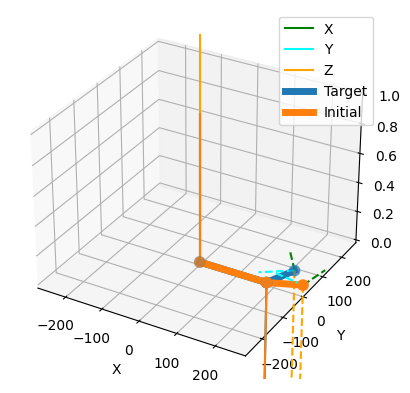

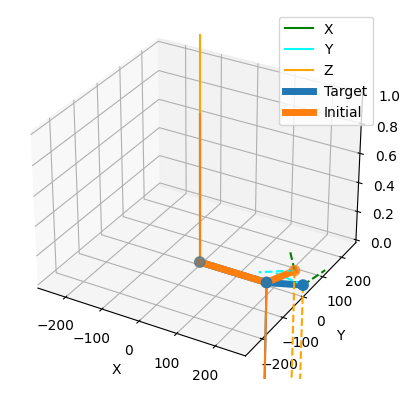

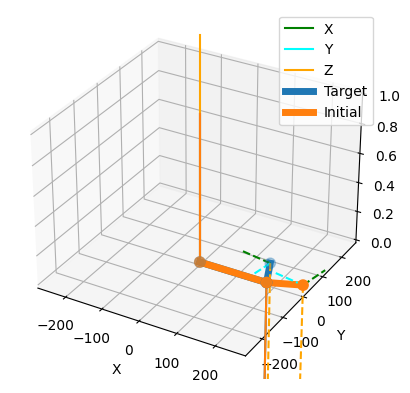

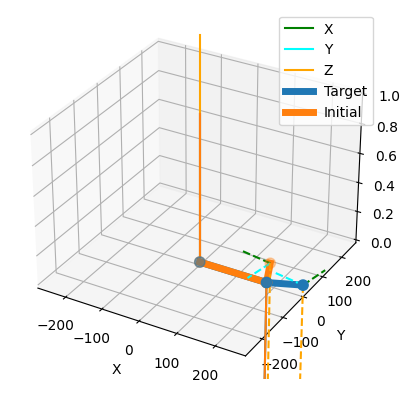

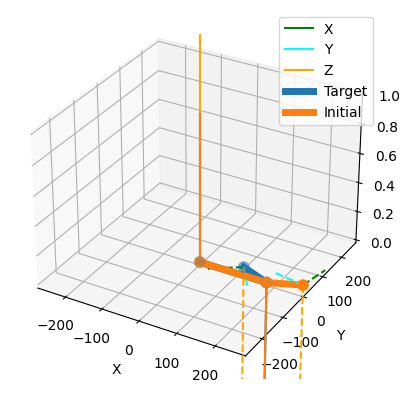

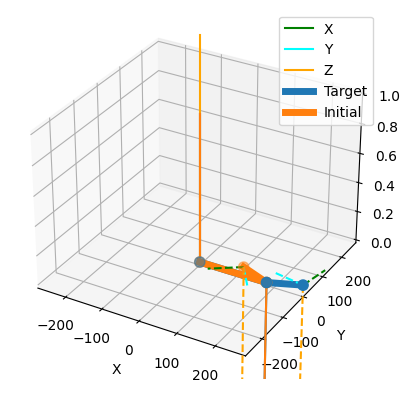

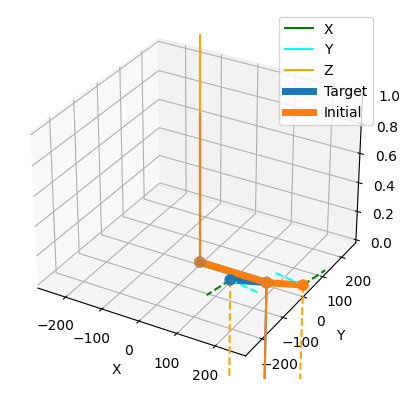

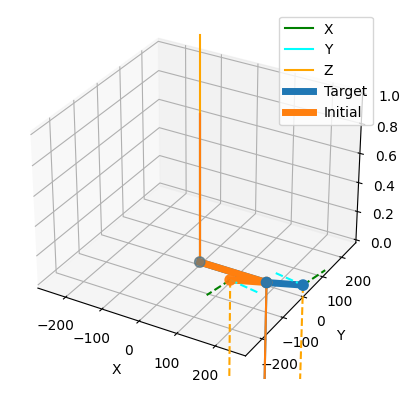

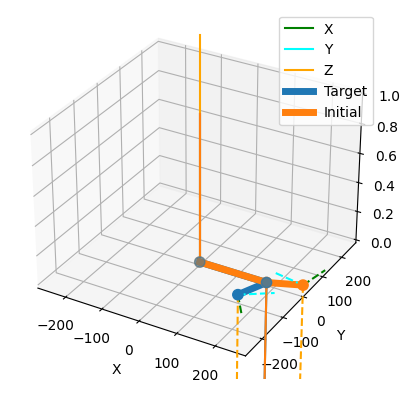

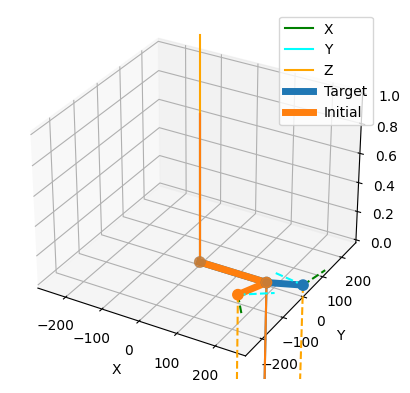

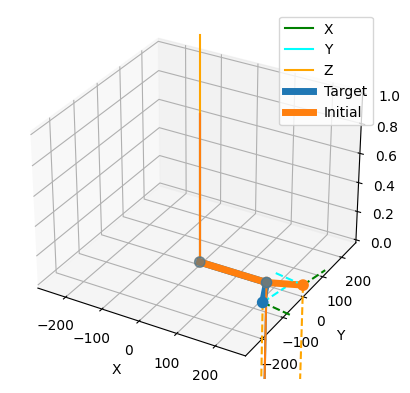

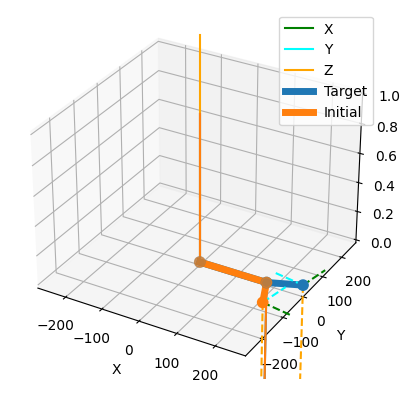

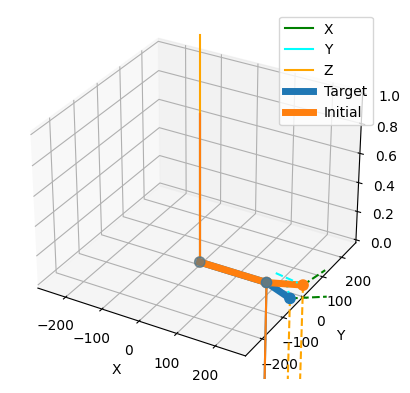

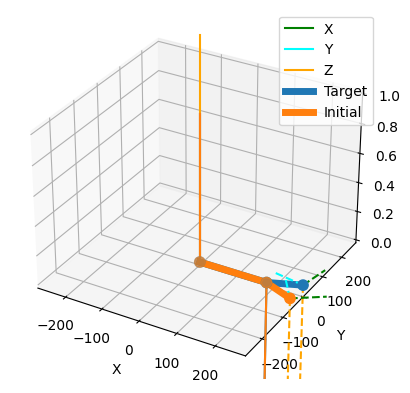

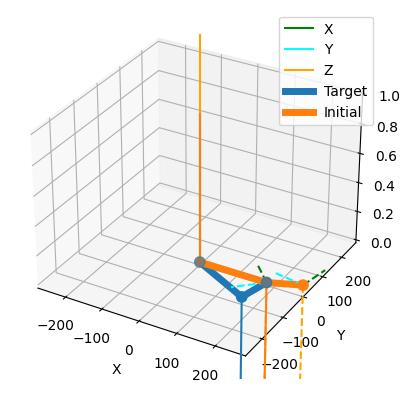

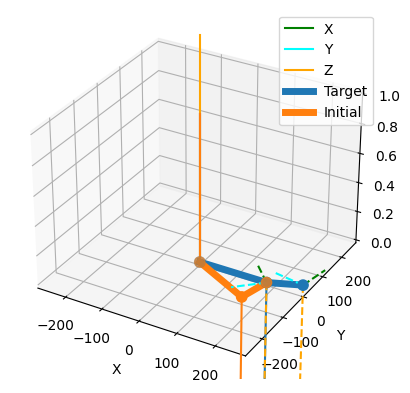

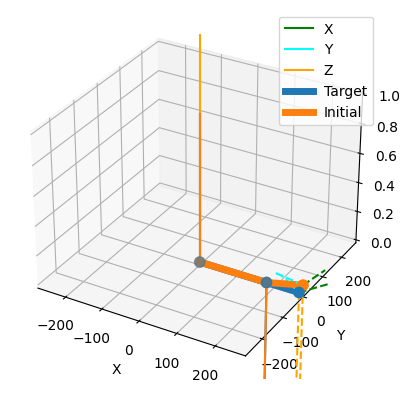

In [6]:
### MAIN SCRIPT
ps.fill_tray_SIMULATED(tray_1, [sum([sorter_parameters[n].get('length_mm') for n in range(len(sorter_parameters))]), 0], sorter_parameters, sorter_chain, purge_slot=0)